<a href="https://colab.research.google.com/github/nomarine/intro_machine_learning/blob/main/Introdu%C3%A7%C3%A3o_%C3%A0_ML_Classifica%C3%A7%C3%A3o_Aula_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install graphviz==0.10
!apt-get install graphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [ ]:
import pandas as pd
from datetime import datetime

uri = "https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv"
dataset = pd.read_csv(uri)

colunas_renomeadas = {
    'price' : 'preco',
    'sold' : 'vendido',
    'model_year' : 'ano_modelo'
}
dataset = dataset.rename(columns = colunas_renomeadas)

vendido_binario= {
    'yes':1,
    'no':0
}
dataset.vendido = dataset.vendido.map(vendido_binario)

ano_atual = datetime.today().year
dataset['idade_modelo'] = ano_atual - dataset.ano_modelo
dataset['km_por_ano'] = dataset.mileage_per_year * 1.60934

dataset = dataset.drop(columns=['mileage_per_year', 'Unnamed: 0', 'ano_modelo'], axis=1)

dataset.head()

,preco,vendido,idade_modelo,km_por_ano
0,30941.02,1,24,35085.22134
1,40557.96,1,26,12622.05362
2,89627.50,0,18,11440.79806
3,95276.14,0,9,43167.32682
4,117384.68,1,10,12770.11290


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
import numpy as np

seed = 20
np.random.seed(seed)

x = dataset[['preco', 'km_por_ano', 'idade_modelo']]
y = dataset['vendido']

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y,
                                                        test_size=0.25,
                                                        stratify=y)
print("Amostra de treino = %d | Amostras de teste = %d" % (len(treino_x), len(teste_y)))

model = LinearSVC()
model.fit(treino_x, treino_y)
previsao = model.predict(teste_x)
acuracia = accuracy_score(teste_y, previsao) * 100
print("Acurácia = %.2f%%" % (acuracia))

Amostra de treino = 7500 | Amostras de teste = 2500
Acurácia = 56.96%


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy='stratified')
dummy.fit(treino_x, treino_y)
acuracia = dummy.score(teste_x, teste_y) * 100
print("Acurácia dummy stratified = %.2f%%" % (acuracia))

Acurácia dummy stratified = 52.20%


In [ ]:
dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(treino_x, treino_y)
acuracia = dummy.score(teste_x, teste_y) * 100
print("Acurácia dummy most frequent = %.2f%%" % (acuracia))

Acurácia dummy most frequent = 58.00%


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y,
                                                        test_size=0.25,
                                                        stratify=y)
print("Amostra de treino = %d | Amostras de teste = %d" % (len(treino_x), len(teste_y)))

scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = SVC()
modelo.fit(treino_x, treino_y)
previsao = modelo.predict(teste_x)
acuracia = accuracy_score(teste_y, previsao) * 100
print("Acurácia dummy most frequent = %.2f%%" % (acuracia))

Amostra de treino = 7500 | Amostras de teste = 2500
Acurácia dummy most frequent = 77.16%


Amostra de treino = 7500 | Amostras de teste = 2500
Acurácia dummy most frequent = 77.88%


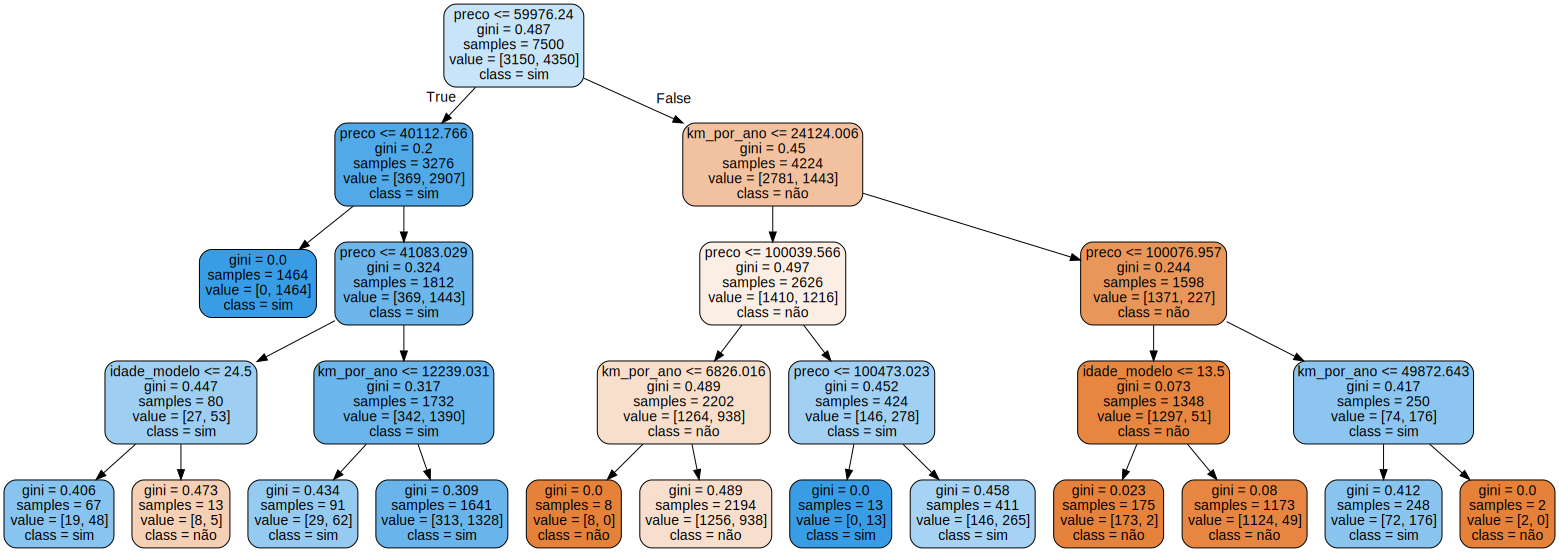

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import export_graphviz
import graphviz

raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y,
                                                        test_size=0.25,
                                                        stratify=y)
print("Amostra de treino = %d | Amostras de teste = %d" % (len(treino_x), len(teste_y)))

modelo = DecisionTreeClassifier(max_depth=4)
modelo.fit(raw_treino_x, treino_y)
previsao = modelo.predict(raw_teste_x)
acuracia = accuracy_score(teste_y, previsao) * 100
print("Acurácia dummy most frequent = %.2f%%" % (acuracia))

features = x.columns
dot_data = export_graphviz(modelo,
                           filled=True, rounded=True,
                           feature_names = features,
                           class_names=['não', 'sim'])
grafico = graphviz.Source(dot_data)
grafico